<a href="https://colab.research.google.com/github/ASMA-droid200/RNN/blob/main/ASMA_AYARI_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assessment of soft computing : Asma Ayari "IIA5" .

#I imported some essential libraries for data manipulation and visualization

In [2]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# This ensures that if I use any random functions from NumPy, I'll get the same random numbers every time I run the script.
# And to reproduce the exact same results when I share my code with your honor.
np.random.seed(2)


# Checking my current working directory

In [5]:
import os
print(os.getcwd())


/content


# Uploading  files directly to my Colab environment

In [6]:
from google.colab import files
uploaded = files.upload()


Saving dataset.csv to dataset.csv


In [7]:
# Assuming and Read the data"dataset.csv"
df = pd.read_csv("dataset.csv")
df.shape

(200, 3)

# Showing the first 5 rows of my DataFrame

In [8]:
df.head()

,x1,x2,target
0,1.065701,1.645795,1.0
1,0.112153,1.005711,1.0
2,-1.469113,0.598036,1.0
3,-1.554499,1.034249,1.0
4,-0.097040,-0.146800,0.0


# Print the distribution of the target variable in class 0 & 1

"The value_counts() is a function in pandas to display the count of unique values in the 'target' column, which represents the distribution of classes"


In [11]:
class_distribution = df['target'].value_counts()

# Print the distribution
print(class_distribution)

0.0    103
1.0     97
Name: target, dtype: int64


"This indicates that there are 103 instances of class 0 and 97 instances of class 1 in your datase"

# Plot the distribution of the target variable

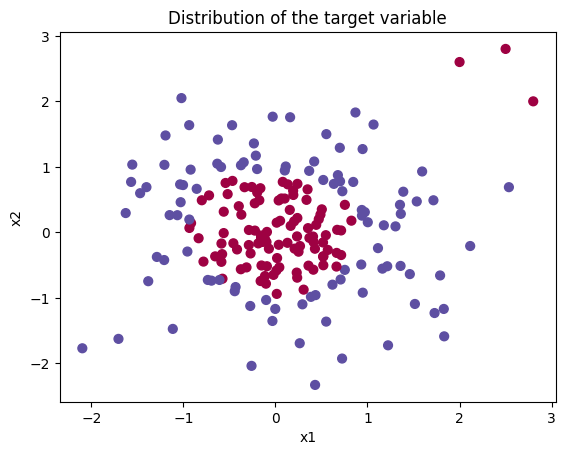

In [15]:
# Scatter plot  visualize the distribution of the target variable based on two features (x1 and x2).
# The c parameter is used to color the points based on the target variable, and s controls the size of the points.
plt.scatter(df['x1'], df['x2'], c=df['target'].values.reshape(200,), s=40, cmap=plt.cm.Spectral)
plt.title(' Distribution of the target variable ')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Prepare the data for model training

In [18]:
# Reshaping the input features X and the target variable Y

# X is transposed to have shape (number of features, number of examples)
X = df[['x1','x2']].values.T

# Y is reshaped to have have a single row -> shape (1, number of examples)
Y = df['target'].values.reshape(1,-1)
# Print the shapes
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (2, 200)
Shape of Y: (1, 200)


# Set the hyperparameters

In [19]:
# Number of examples
m = X.shape[1]

# Set the hyperparameters
n_x = 2                    # Number of neurons in the input layer
n_h = 10                   # Number of neurons in the hidden layer
n_y = 1                    # Number of neurons in the output layer
num_of_iters = 1000        # Number of training iterations/epochs
learning_rate = 0.3        # Learning rate for gradient descent

These hyperparameters are crucial for training my neural network. I would use them in the process of initializing my neural network architecture and during the training phase.

# Define the sigmoid activation function

In [20]:

def sigmoid(z):
    return 1/(1 + np.exp(-z))

I've defined the sigmoid activation function.
The sigmoid function is commonly used in binary classification problems within neural networks as it squashes its input into the range (0, 1).

# Initialize weigth & bias parameters

In [21]:

def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x)
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)
    b2 = np.zeros((n_y, 1))

    parameters = {
        "W1": W1,
        "b1" : b1,
        "W2": W2,
        "b2" : b2
      }
    return parameters

I've implemented a function to initialize the parameters for a neural network. This function initializes the weights and biases for the input layer, hidden layer, and output layer.

I've using np.random.randn to initialize the weights with random values from a standard normal distribution, and np.zeros to initialize the biases with zeros.

# Function for forward propagation

In [22]:

def forward_prop(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {
      "A1": A1,
      "A2": A2
     }
    return A2, cache

I've implemented the forward propagation function for a neural network. This function computes the activations for each layer in the network.
Z1: The linear transformation (weighted sum of inputs and bias) for the hidden layer.

A1: The activation of the hidden layer, computed using the hyperbolic tangent (tanh) activation function.

Z2: The linear transformation for the output layer.

A2: The final output of the network, computed using the sigmoid activation function

The function returns A2, which represents the output of the neural network, and a cache dictionary containing intermediate values that will be useful for backpropagation.

# Function to calculate the loss

In [23]:
def calculate_cost(A2, Y):
    cost = -np.sum(np.multiply(Y, np.log(A2)) +  np.multiply(1-Y, np.log(1-A2)))/m
    cost = np.squeeze(cost)
    return cost

I've  implemented the cost calculation function for my RNN. It using the binary cross-entropy loss, which is commonly used for binary classification problems.

A2: The output of the neural network (predictions).

Y: The true labels.

m: The number of examples.

The cost is computed using the binary cross-entropy loss formula.

# Function for back-propagation

In [24]:
def backward_prop(X, Y, cache, parameters):
    A1 = cache["A1"]
    A2 = cache["A2"]

    W2 = parameters["W2"]

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis=1, keepdims=True)/m
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1-np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis=1, keepdims=True)/m

    grads = {
    "dW1": dW1,
    "db1": db1,
    "dW2": dW2,
    "db2": db2
    }

    return grads

I've implemented the backward propagation function for my RNN. This function computes the gradients of the cost with respect to the parameters, which will be used to update the parameters during the optimization process.

dZ2: The derivative of the cost with respect to the pre-activation of the output layer.

dW2: The gradient of the cost with respect to the weights of the output layer.

db2: The gradient of the cost with respect to the biases of the output layer.

dZ1: The derivative of the cost with respect to the pre-activation of the hidden layer.

dW1: The gradient of the cost with respect to the weights of the hidden layer.

db1: The gradient of the cost with respect to the biases of the hidden layer.

These gradients will be used in the optimization step to update the parameters of the neural network.

# Function to update the weigth & bias parameters

In [25]:
def update_parameters(parameters, grads, learning_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2

    new_parameters = {
    "W1": W1,
    "W2": W2,
    "b1" : b1,
    "b2" : b2
    }

    return new_parameters

I've implemented the function to update the parameters of my RNN based on the gradients calculated during backward propagation.

This function takes the current parameters, gradients, and learning rate as inputs and updates the parameters using gradient descent. The new parameters are then returned.

# Define the Model

In [26]:
def model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate,display_loss=False):
    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(0, num_of_iters+1):
        a2, cache = forward_prop(X, parameters)

        cost = calculate_cost(a2, Y)

        grads = backward_prop(X, Y, cache, parameters)

        parameters = update_parameters(parameters, grads, learning_rate)

        if display_loss:
            if(i%100 == 0):
                print('Cost after iteration# {:d}: {:f}'.format(i, cost))

    return parameters

I've implemented the main training loop for my RNN model.
 This function takes input data X and labels Y, along with the hyperparameters and the number of iterations. It initializes parameters, performs forward and backward propagation, updates parameters using gradient descent, and optionally displays the loss at certain intervals.

 This function allows me to train my RNN by calling model and passing the necessary input data and hyperparameters. If display_loss is set to True, it will print the cost at every 100 iterations.

# The trained_parameters holds the learned weights and biases after training My RNN.

In [27]:
trained_parameters = model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate,display_loss=True)

Cost after iteration# 0: 0.727895
Cost after iteration# 100: 0.438707
Cost after iteration# 200: 0.308236
Cost after iteration# 300: 0.239390
Cost after iteration# 400: 0.200191
Cost after iteration# 500: 0.175058
Cost after iteration# 600: 0.157424
Cost after iteration# 700: 0.144189
Cost after iteration# 800: 0.133626
Cost after iteration# 900: 0.124717
Cost after iteration# 1000: 0.116933


I've training my RNN using the model function with the specified hyperparameters. The training progress is  displayed, and the trained parameters is stored in the trained_parameters variable.

# Define function for prediction

In [28]:
def predict(parameters, X):
    A2, cache = forward_prop(X,parameters)
    predictions = A2 > 0.5

    return predictions

I've implemented a prediction function that takes the learned parameters and input data X, performs forward propagation to obtain the output, and then converts the output probabilities into binary predictions based on a threshold (0.5 in this case).

This returns a boolean array (True or False) where True indicates that the corresponding example is predicted to belong to class 1, and False indicates class 0.

# Define function to plot the decision boundary

In [29]:

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.reshape(200,), cmap=plt.cm.Spectral)

I've implemented a function to plot the decision boundary of my binary classification model.

This function takes my trained model (model), input features X, and corresponding labels y. It uses contourf from Matplotlib to visualize the decision boundary.

# Plot the decision boundary

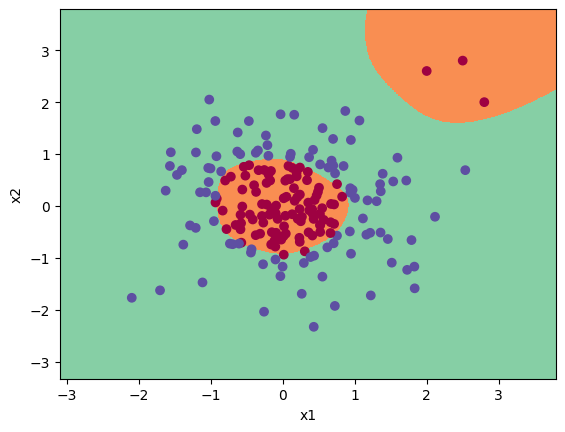

In [30]:
#The lambda function is used to create a function that takes input features and returns predictions.
plot_decision_boundary(lambda x: predict(trained_parameters, x.T), X, Y)

This plot is dispalyed with the decision boundary and the training examples.

The decision boundary is the contour where the neural network predicts a change from one class to another.

# Let's see how our Neural Network work with different hidden layer sizes

So will see the subplot for each hidden layer size ,and plots the decision boundary for the corresponding neural network configuration.

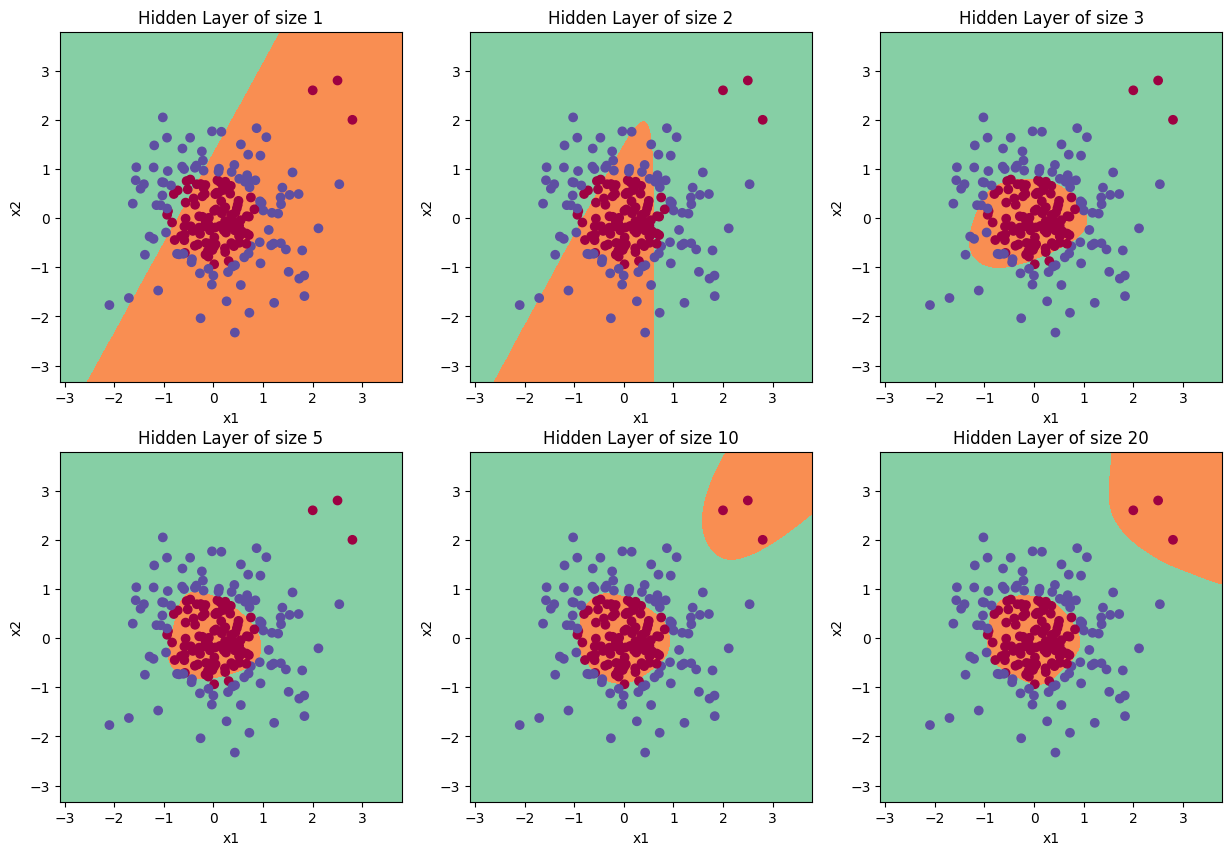

In [32]:

plt.figure(figsize=(15, 10))
hidden_layer_sizes = [1, 2, 3, 5, 10,20]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(2, 3, i+1)
    plt.title('Hidden Layer of size %d' % n_h)

    parameters = model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)

I've experimenting with different sizes of the hidden layer  "[1, 2, 3, 5, 10,20]", in my  neural network and visualizing the decision boundaries for each configuration.

I observe how the complexity of the neural network architecture, particularly the hidden layer size, affects the decision boundaries.

#From the above results, we can say that the model gives better performance with the more hidden units. But, sometimes the more hidden units overfit the data.